In [1]:
import numpy as np
data=np.load('Thousand_bp_trial2.npz')
X_train=data['arr_0']
y_train=data['arr_1']
X_test=data['arr_2']
y_test=data['arr_3']

In [2]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y_train=y_train.reshape(y_train.shape[0])
y_test=y_test.reshape(y_test.shape[0])

In [3]:
import tensorflow as tf
import math
import pickle
from tensorflow import keras
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Embedding, Dense
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.losses import BinaryCrossentropy

In [9]:
model = Sequential()

# kernel size here was changed to 12
model.add(Conv1D(filters=64, kernel_size=10, padding='valid',activation='relu',input_shape=(np.shape(X_train)[1],1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, padding='valid',activation='relu',input_shape=(np.shape(X_train)[1],1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, padding='valid',activation='relu',input_shape=(np.shape(X_train)[1],1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=3, padding='valid',activation='relu',input_shape=(np.shape(X_train)[1],1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))

model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#opt=keras.optimizers.Adam(learning_rate=0.0001) # This learning rate is very low
opt=keras.optimizers.Adam(learning_rate=0.0001)

#model.compile(optimizer='adam',loss='mse')
#model.compile(optimizer='adam',loss='BinaryCrossentropy')

model.compile(optimizer=opt,loss='BinaryCrossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 991, 64)           704       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 495, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 493, 128)          24704     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 246, 128)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 244, 64)           24640     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 122, 64)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 120, 32)          

In [10]:
initial_weights=model.get_weights()

In [11]:
import matplotlib.pyplot as plt

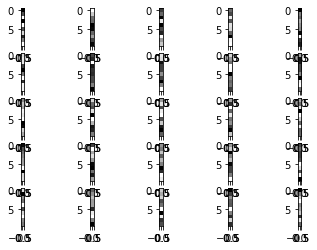

In [13]:
x1w = initial_weights[0][:,:] #not sure if this [0] is needed here
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

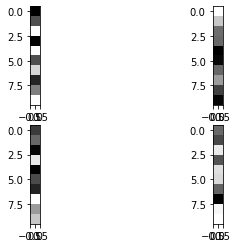

In [15]:
x1w = initial_weights[0][:,:] #not sure if this [0] is needed here
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

In [16]:
history=model.fit(x=X_train,y=y_train,epochs=300,validation_data=(X_test,y_test),batch_size=100) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

Epoch 1/300
3569/3569 [==============================] - 847s 237ms/step - loss: 0.6015 - accuracy: 0.6526 - val_loss: 0.4748 - val_accuracy: 0.7863
Epoch 2/300
3569/3569 [==============================] - 879s 246ms/step - loss: 0.4750 - accuracy: 0.7816 - val_loss: 0.4158 - val_accuracy: 0.8152
Epoch 3/300
3569/3569 [==============================] - 899s 252ms/step - loss: 0.3767 - accuracy: 0.8384 - val_loss: 0.4340 - val_accuracy: 0.8091
Epoch 4/300
3569/3569 [==============================] - 894s 251ms/step - loss: 0.2604 - accuracy: 0.8944 - val_loss: 0.1519 - val_accuracy: 0.9449
Epoch 5/300
3569/3569 [==============================] - 902s 253ms/step - loss: 0.1581 - accuracy: 0.9405 - val_loss: 0.0979 - val_accuracy: 0.9672
Epoch 6/300
3569/3569 [==============================] - 904s 253ms/step - loss: 0.1141 - accuracy: 0.9588 - val_loss: 0.1097 - val_accuracy: 0.9603
Epoch 7/300
3569/3569 [==============================] - 903s 253ms/step - loss: 0.0809 - accuracy: 0.9721

KeyboardInterrupt: 

In [17]:
weights=model.get_weights()

In [25]:
initial_weights[0][:,:,1]

array([[-0.06058707],
       [-0.0184421 ],
       [ 0.07306904],
       [-0.05847768],
       [ 0.07215492],
       [-0.01882544],
       [ 0.05143644],
       [-0.0412807 ],
       [ 0.00604349],
       [ 0.07218963]], dtype=float32)

In [24]:
weights[0][:,:,1]

array([[-0.07163953],
       [-0.01646474],
       [ 0.07647277],
       [-0.07862039],
       [ 0.08148801],
       [-0.02940725],
       [ 0.07404654],
       [-0.06480801],
       [ 0.00108969],
       [ 0.07298261]], dtype=float32)

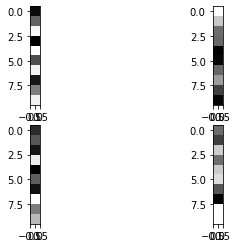

In [18]:
x1w = weights[0][:,:] #not sure if this [0] is needed here
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

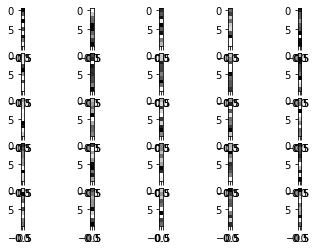

In [19]:
x1w = model.get_weights()[0][:,:] #not sure if this [0] is needed here
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

In [20]:
model.save('10000bp_model2.h5')

In [21]:
loss_df=pd.DataFrame(model.history.history)
loss_df.to_csv('partial_trained_BPmodel2.csv')

In [22]:
from tensorflow.keras.models import load_model
new_model=load_model('10000bp_model2.h5')